In [1]:
# using keras imdb dataset
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dropout, Dense, Flatten, Embedding, LSTM
from keras.callbacks import ModelCheckpoint
from keras.layers.wrappers import Bidirectional

import os
from sklearn.metrics import roc_auc_score

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# set up params
output = 'model/dense_example'
epochs = 6
batch = 128

n_dim = 64
n_words = 5000
n_words_skip = 50
max_length = 200
pad_type = trunc_type = 'pre' # truncate start of reviews

n_dense = 64
dropout = 0.5

In [3]:
# load data
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=n_words, skip_top=n_words_skip)

In [4]:
# example of how to go back to words from int 
w_idx = keras.datasets.imdb.get_word_index()
w_idx = {k:(v+3) for k,v in w_idx.items()}
w_idx['PAD'] = 0
w_idx['START'] = 1
w_idx['UNK'] = 2

index_word = {v:k for k,v in w_idx.items()}

In [5]:
x_train = pad_sequences(x_train, maxlen=max_length, padding=pad_type, truncating=trunc_type, value=0)
x_val = pad_sequences(x_val, maxlen=max_length, padding=pad_type, truncating=trunc_type, value=0)

In [6]:
# setup our nn model
model = Sequential()

model.add(Embedding(n_words, n_dim, input_length=max_length))
model.add(Bidirectional(LSTM(64, dropout=dropout)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 64)           320000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 386,177
Trainable params: 386,177
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(
    x_train, 
    y_train,
    epochs=epochs, 
    batch_size=batch, 
    verbose=1, 
    validation_data=(x_val, y_val))

Train on 25000 samples, validate on 25000 samples
Epoch 1/6
25000/25000 [==============================] - 83s 3ms/step - loss: 0.5047 - acc: 0.7331 - val_loss: 0.3232 - val_acc: 0.8628
Epoch 2/6
25000/25000 [==============================] - 81s 3ms/step - loss: 0.2920 - acc: 0.8827 - val_loss: 0.2983 - val_acc: 0.8750
Epoch 3/6
25000/25000 [==============================] - 79s 3ms/step - loss: 0.2479 - acc: 0.9013 - val_loss: 0.3013 - val_acc: 0.8742
Epoch 4/6
 2304/25000 [=>............................] - ETA: 1:01 - loss: 0.2261 - acc: 0.9110

KeyboardInterrupt: 

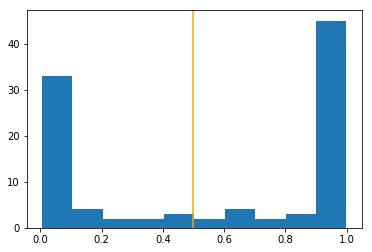

In [10]:
plt.hist(model.predict(x_val[:100]))
_ = plt.axvline(x=0.5, color='orange')